<a href="https://colab.research.google.com/github/mda-les13/EDA_Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Элементы структурированных данных

Импорт необходимых библиотек

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Установка стиля для визуализации

In [287]:
sns.set(style="whitegrid")

Создание примера датасета

In [288]:
np.random.seed(42)  # Для воспроизводимости результатов

data = {
    'Возраст': np.random.randint(18, 66, size=100),
    'Доход': np.random.normal(50000, 15000, 100).astype(int),
    'Пол': np.random.choice(['Мужской', 'Женский'], size=100),
    'Уровень образования': np.random.choice(
        ['Среднее', 'Бакалавр', 'Магистр', 'Доктор'],
        size=100,
        p=[0.2, 0.35, 0.3, 0.15]
    ),
    'Количество покупок': np.random.poisson(lam=5, size=100)
}

df = pd.DataFrame(data)
print("Датасет создан успешно!")

Датасет создан успешно!


Основная информация о данных

In [289]:
print("\nОсновная информация о данных:")
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nСтатистическое описание числовых переменных:")
display(df.describe())


Основная информация о данных:
Размер датасета: (100, 5)

Первые 5 строк:


,Возраст,Доход,Пол,Уровень образования,Количество покупок
0,56,58731,Женский,Среднее,3
1,46,63316,Мужской,Доктор,4
2,32,63414,Женский,Доктор,6
3,60,61324,Женский,Доктор,4
4,25,46892,Женский,Бакалавр,8



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Возраст              100 non-null    int64 
 1   Доход                100 non-null    int64 
 2   Пол                  100 non-null    object
 3   Уровень образования  100 non-null    object
 4   Количество покупок   100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB

Статистическое описание числовых переменных:


,Возраст,Доход,Количество покупок
count,100.000000,100.000000,100.000000
mean,40.920000,51353.610000,4.880000
std,14.054497,14384.006056,2.056181
min,18.000000,10172.000000,1.000000
25%,30.500000,43282.000000,3.000000
50%,41.000000,50098.000000,5.000000
75%,53.250000,61531.000000,6.000000
max,65.000000,100584.000000,10.000000


Анализ типов данных

In [290]:
print("\nАнализ типов данных:")
print(df.dtypes)


Анализ типов данных:
Возраст                 int64
Доход                   int64
Пол                    object
Уровень образования    object
Количество покупок      int64
dtype: object


Преобразование категориальных переменных

In [291]:
df['Пол'] = df['Пол'].astype('category')
df['Уровень образования'] = df['Уровень образования'].astype('category')
print("\nТипы данных после преобразования категориальных переменных:")
print(df.dtypes)


Типы данных после преобразования категориальных переменных:
Возраст                   int64
Доход                     int64
Пол                    category
Уровень образования    category
Количество покупок        int64
dtype: object


Визуализация данных

In [292]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Диаграмма рассеяния


Диаграмма рассеяния: Возраст vs Доход


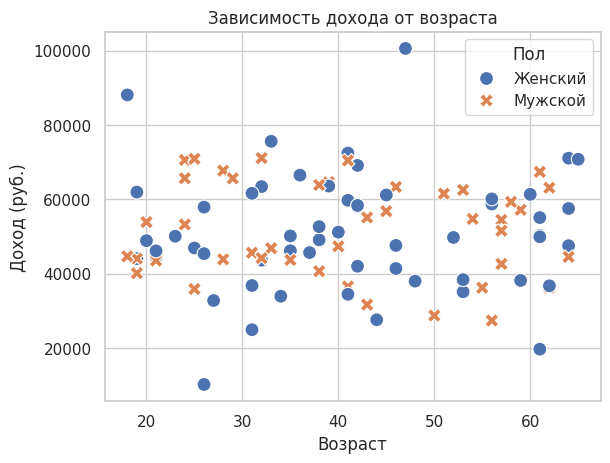

In [293]:
print("\nДиаграмма рассеяния: Возраст vs Доход")
sns.scatterplot(x='Возраст', y='Доход', data=df, hue='Пол', style='Пол', s=100)
plt.title('Зависимость дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доход (руб.)')
plt.show()

Коробчатая диаграмма (boxplot)


Коробчатая диаграмма: Доход по уровню образования


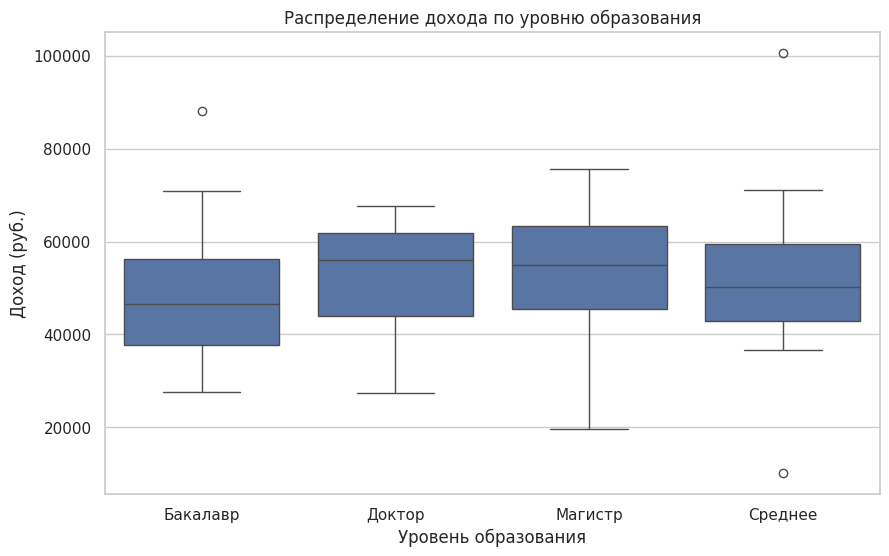

In [294]:
print("\nКоробчатая диаграмма: Доход по уровню образования")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Уровень образования', y='Доход', data=df)
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Доход (руб.)')
plt.show()

Столбчатая диаграмма


Столбчатая диаграмма: Распределение по уровню образования


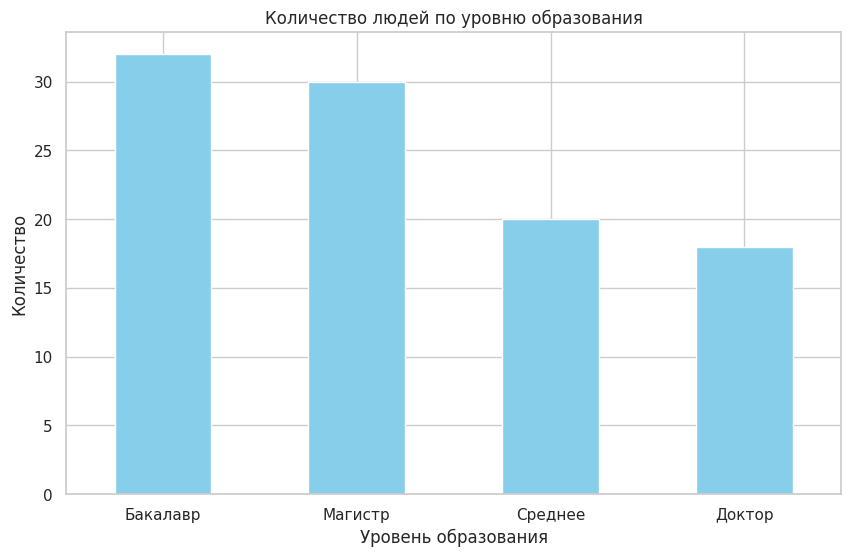

In [295]:
print("\nСтолбчатая диаграмма: Распределение по уровню образования")
plt.figure(figsize=(10, 6))
df['Уровень образования'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Количество людей по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Круговая диаграмма


Круговая диаграмма: Распределение по полу


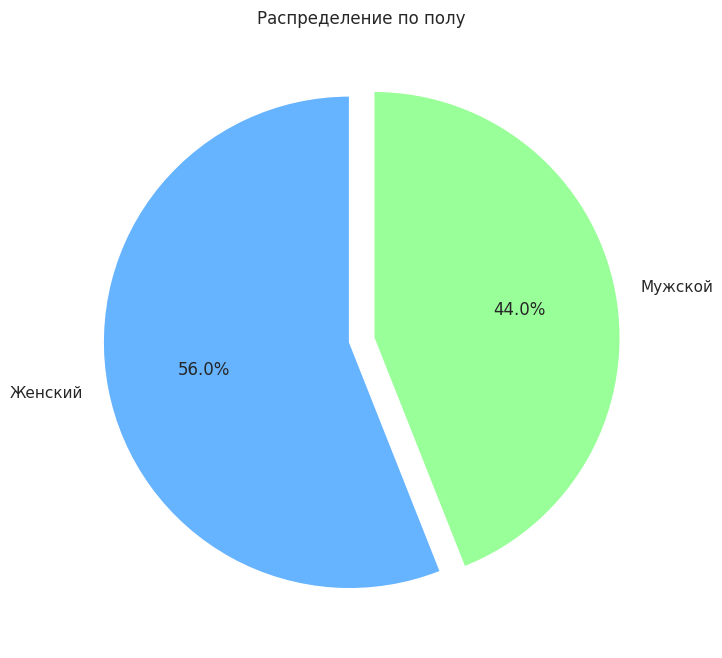

In [296]:
print("\nКруговая диаграмма: Распределение по полу")
plt.figure(figsize=(8, 8))
df['Пол'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99'],
    explode=[0.05, 0.05]
)
plt.title('Распределение по полу')
plt.ylabel('')  # Убираем метку оси Y
plt.show()

Дополнительные метрики

In [297]:
print("\nДополнительные метрики для дохода:")
print(f"Среднее значение: {df['Доход'].mean():.2f} руб.")
print(f"Медиана: {df['Доход'].median():.2f} руб.")
print(f"Стандартное отклонение: {df['Доход'].std():.2f} руб.")
print(f"Минимальное значение: {df['Доход'].min()} руб.")
print(f"Максимальное значение: {df['Доход'].max()} руб.")


Дополнительные метрики для дохода:
Среднее значение: 51353.61 руб.
Медиана: 50098.00 руб.
Стандартное отклонение: 14384.01 руб.
Минимальное значение: 10172 руб.
Максимальное значение: 100584 руб.


Корреляция между числовыми переменными


Корреляция между числовыми переменными:


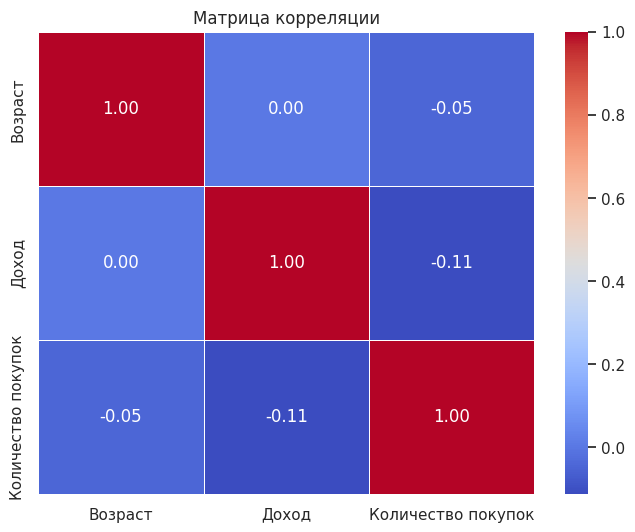

In [298]:
print("\nКорреляция между числовыми переменными:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

# Кадры данных и индексы

Работа с индексами в pandas

In [299]:
import pandas as pd
import numpy as np
from datetime import datetime

Создаем пример данных для демонстрации

In [300]:
data = {
    'ID': [101, 102, 103, 104, 105],
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [25, 30, 35, 40, 45],
    'Город': ['Москва', 'Санкт-Петербург', 'Москва', 'Казань', 'Санкт-Петербург'],
    'Продажи': [1500, 2300, 1800, 3200, 2700]
}
df = pd.DataFrame(data)
print("Исходный датасет:")
display(df)

Исходный датасет:


,ID,Имя,Возраст,Город,Продажи
0,101,Анна,25,Москва,1500
1,102,Борис,30,Санкт-Петербург,2300
2,103,Виктор,35,Москва,1800
3,104,Галина,40,Казань,3200
4,105,Дмитрий,45,Санкт-Петербург,2700


Автоматический индекс

In [301]:
print("\n=== Автоматический индекс ===")
print("Текущий индекс (по умолчанию):")
print(df.index)
print("\nТип индекса:", type(df.index))


=== Автоматический индекс ===
Текущий индекс (по умолчанию):
RangeIndex(start=0, stop=5, step=1)

Тип индекса: <class 'pandas.core.indexes.range.RangeIndex'>


Установка пользовательского индекса

In [302]:
print("\n=== Установка пользовательского индекса ===")
df_user = df.set_index('ID')
print("Датасет с индексом по ID:")
display(df_user)
print("\nНовый индекс:")
print(df_user.index)
print("Тип индекса после установки:", type(df_user.index))


=== Установка пользовательского индекса ===
Датасет с индексом по ID:


,Имя,Возраст,Город,Продажи
ID,,,,
101,Анна,25,Москва,1500
102,Борис,30,Санкт-Петербург,2300
103,Виктор,35,Москва,1800
104,Галина,40,Казань,3200
105,Дмитрий,45,Санкт-Петербург,2700



Новый индекс:
Index([101, 102, 103, 104, 105], dtype='int64', name='ID')
Тип индекса после установки: <class 'pandas.core.indexes.base.Index'>


Многоуровневый (иерархический) индекс

In [303]:
print("\n=== Многоуровневый индекс ===")
df_multi = df.set_index(['Город', 'Возраст'])
print("Датасет с многоуровневым индексом (Город, Возраст):")
display(df_multi)
print("\nУровни индекса:", df_multi.index.names)
print("Количество уровней:", df_multi.index.nlevels)


=== Многоуровневый индекс ===
Датасет с многоуровневым индексом (Город, Возраст):


,,ID,Имя,Продажи
Город,Возраст,,,
Москва,25,101,Анна,1500
Санкт-Петербург,30,102,Борис,2300
Москва,35,103,Виктор,1800
Казань,40,104,Галина,3200
Санкт-Петербург,45,105,Дмитрий,2700



Уровни индекса: ['Город', 'Возраст']
Количество уровней: 2


Доступ к данным через иерархический индекс

In [304]:
print("\n=== Доступ к данным через иерархический индекс ===")


=== Доступ к данным через иерархический индекс ===


Доступ к конкретной ячейке

In [305]:
print("\nДанные для Москвы, возраст 25:")
display(df_multi.loc[('Москва', 25)])


Данные для Москвы, возраст 25:


,Москва
,25
ID,101
Имя,Анна
Продажи,1500


Доступ ко всем строкам для конкретного города

In [306]:
print("\nВсе данные для Санкт-Петербурга:")
display(df_multi.xs('Санкт-Петербург', level='Город'))


Все данные для Санкт-Петербурга:


,ID,Имя,Продажи
Возраст,,,
30,102,Борис,2300
45,105,Дмитрий,2700


Доступ по нескольким уровням с использованием slice

In [307]:
print("\nДанные для всех возрастов в Москве:")
display(df_multi.loc[('Москва', slice(None))])


Данные для всех возрастов в Москве:


,ID,Имя,Продажи
Возраст,,,
25,101,Анна,1500
35,103,Виктор,1800


Возврат к обычному индексу (сброс индекса)

In [308]:
print("\n=== Возврат к обычному индексу ===")
df_reset = df_multi.reset_index()
print("Датасет после сброса индекса:")
display(df_reset)
print("\nТекущий индекс после сброса:")
print(df_reset.index)


=== Возврат к обычному индексу ===
Датасет после сброса индекса:


,Город,Возраст,ID,Имя,Продажи
0,Москва,25,101,Анна,1500
1,Санкт-Петербург,30,102,Борис,2300
2,Москва,35,103,Виктор,1800
3,Казань,40,104,Галина,3200
4,Санкт-Петербург,45,105,Дмитрий,2700



Текущий индекс после сброса:
RangeIndex(start=0, stop=5, step=1)


Использование индекса для временных рядов

In [309]:
print("\n=== Использование индекса для временных рядов ===")
# Создаем временной ряд с датами
dates = pd.date_range(start='2023-01-01', periods=7, freq='D')
sales_data = [1200, 1500, 1300, 1800, 2100, 1900, 2400]
time_series = pd.Series(sales_data, index=dates, name='Продажи')
print("Временной ряд с датами в индексе:")
display(time_series)


=== Использование индекса для временных рядов ===
Временной ряд с датами в индексе:


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


Доступ по дате

In [310]:
print("\nПродажи за 2023-01-05:")
print(time_series['2023-01-05'])


Продажи за 2023-01-05:
2100


Срез по диапазону дат

In [311]:
print("\nПродажи с 2023-01-03 по 2023-01-06:")
print(time_series['2023-01-03':'2023-01-06'])


Продажи с 2023-01-03 по 2023-01-06:
2023-01-03    1300
2023-01-04    1800
2023-01-05    2100
2023-01-06    1900
Freq: D, Name: Продажи, dtype: int64


Преобразование в DataFrame с временным индексом

In [312]:
df_time = time_series.to_frame()
print("\nDataFrame с временным индексом:")
display(df_time)


DataFrame с временным индексом:


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


Пример сортировки по индексу

In [313]:
print("\nСортировка по индексу (датам):")
sorted_df = df_time.sort_index()
display(sorted_df)


Сортировка по индексу (датам):


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


# Оценка центрального положения

Создаем пример данных с выбросом

In [314]:
import numpy as np
import pandas as pd

data = np.array([1000, 2000, 3000, 4000, 5000, 100000])  # Выброс 100000
weights = np.array([1, 1, 1, 1, 1, 10])  # Веса для взвешенных мер

Создаем DataFrame для наглядности

In [315]:
df = pd.DataFrame({
    'Значение': data,
    'Вес': weights
})

print("Исходные данные:")
display(df)
print("\n" + "="*50 + "\n")

Исходные данные:


,Значение,Вес
0,1000,1
1,2000,1
2,3000,1
3,4000,1
4,5000,1
5,100000,10


1. Среднее (mean)

In [316]:
mean_value = np.mean(data)
print("1. Среднее значение (mean):")
print(f"Расчет: ({' + '.join(map(str, data))}) / {len(data)} = {mean_value:.2f}")
print(f"Результат: {mean_value:.2f}")
print("Пояснение: Среднее очень чувствительно к выбросам (100000 сильно завышает значение)")


1. Среднее значение (mean):
Расчет: (1000 + 2000 + 3000 + 4000 + 5000 + 100000) / 6 = 19166.67
Результат: 19166.67
Пояснение: Среднее очень чувствительно к выбросам (100000 сильно завышает значение)


2. Медиана (median)

In [317]:
median_value = np.median(data)
print("\n2. Медиана (median):")
sorted_data = np.sort(data)
print(f"Упорядоченные данные: {sorted_data}")
print(f"Медиана (среднее значение 3-го и 4-го элемента): ({sorted_data[2]} + {sorted_data[3]}) / 2 = {median_value:.2f}")
print("Пояснение: Медиана устойчива к выбросам и отражает 'середину' данных")



2. Медиана (median):
Упорядоченные данные: [  1000   2000   3000   4000   5000 100000]
Медиана (среднее значение 3-го и 4-го элемента): (3000 + 4000) / 2 = 3500.00
Пояснение: Медиана устойчива к выбросам и отражает 'середину' данных


3. Усечённое среднее (trimmed mean)

In [318]:
def trimmed_mean(data, proportion=0.1):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    cut = int(n * proportion)
    trimmed = sorted_data[cut:-cut]
    return np.mean(trimmed)

trimmed_mean_value = trimmed_mean(data, proportion=0.1)
print("\n3. Усечённое среднее (trimmed mean, 10%):")
print(f"Удаляем 10% данных с каждого конца (1 элемент)")
print(f"Оставшиеся данные: {np.sort(data)[1:-1]}")
print(f"Усеченное среднее: {trimmed_mean_value:.2f}")
print("Пояснение: Усеченное среднее устойчиво к выбросам, но сохраняет информацию из большей части данных")



3. Усечённое среднее (trimmed mean, 10%):
Удаляем 10% данных с каждого конца (1 элемент)
Оставшиеся данные: [2000 3000 4000 5000]
Усеченное среднее: nan
Пояснение: Усеченное среднее устойчиво к выбросам, но сохраняет информацию из большей части данных


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


4. Взвешенное среднее (weighted mean)

In [319]:
weighted_mean = np.average(data, weights=weights)
print("\n4. Взвешенное среднее (weighted mean):")
weighted_sum = np.sum(data * weights)
total_weight = np.sum(weights)
print(f"Расчет: ({' + '.join([f'{d}*{w}' for d, w in zip(data, weights)])}) / {total_weight}")
print(f"= {weighted_sum} / {total_weight} = {weighted_mean:.2f}")
print("Пояснение: Высокий вес для выброса (10) сильно влияет на результат")



4. Взвешенное среднее (weighted mean):
Расчет: (1000*1 + 2000*1 + 3000*1 + 4000*1 + 5000*1 + 100000*10) / 15
= 1015000 / 15 = 67666.67
Пояснение: Высокий вес для выброса (10) сильно влияет на результат


5. Взвешенная медиана

In [320]:
def weighted_median(values, weights):
    # Сортируем данные по значениям
    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_weights = weights[sorted_indices]

    # Накопленная сумма весов
    cumsum = np.cumsum(sorted_weights)
    total = cumsum[-1]
    half = total / 2

    # Находим индекс, где накопленная сумма >= половины
    idx = np.where(cumsum >= half)[0][0]
    return sorted_values[idx]

weighted_median_value = weighted_median(data, weights)
print("\n5. Взвешенная медиана:")
print(f"Сумма всех весов: {np.sum(weights)}")
print(f"Половина суммы весов: {np.sum(weights)/2:.1f}")
print("Накопленная сумма весов по отсортированным данным:")
for i, (val, w, cum) in enumerate(zip(data, weights, np.cumsum(weights))):
    print(f"  Значение {val} (вес {w}): накопленно {cum}")
print(f"Медиана = {weighted_median_value}")
print("Пояснение: Взвешенная медиана определяется по накопленным весам, а не по количеству элементов")



5. Взвешенная медиана:
Сумма всех весов: 15
Половина суммы весов: 7.5
Накопленная сумма весов по отсортированным данным:
  Значение 1000 (вес 1): накопленно 1
  Значение 2000 (вес 1): накопленно 2
  Значение 3000 (вес 1): накопленно 3
  Значение 4000 (вес 1): накопленно 4
  Значение 5000 (вес 1): накопленно 5
  Значение 100000 (вес 10): накопленно 15
Медиана = 100000
Пояснение: Взвешенная медиана определяется по накопленным весам, а не по количеству элементов


Визуализация для наглядности

In [321]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Сравнение мер центральной тенденции

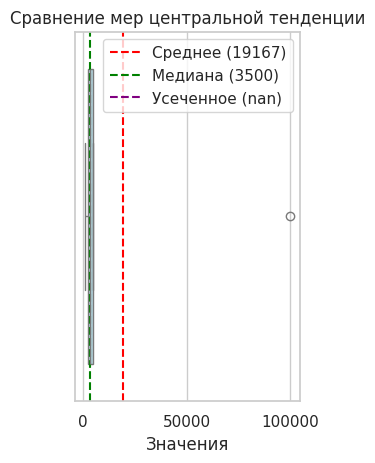

In [322]:
plt.subplot(1, 2, 1)
sns.boxplot(x=data, color='lightblue')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Среднее ({mean_value:.0f})')
plt.axvline(median_value, color='green', linestyle='--', label=f'Медиана ({median_value:.0f})')
plt.axvline(trimmed_mean_value, color='purple', linestyle='--', label=f'Усеченное ({trimmed_mean_value:.0f})')
plt.title('Сравнение мер центральной тенденции')
plt.xlabel('Значения')
plt.legend()

Взвешенные меры

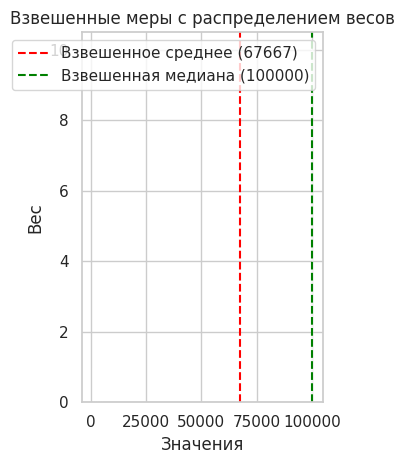

In [323]:
plt.subplot(1, 2, 2)
plt.bar(df['Значение'], df['Вес'], color='skyblue', alpha=0.7)
plt.axvline(weighted_mean, color='red', linestyle='--', label=f'Взвешенное среднее ({weighted_mean:.0f})')
plt.axvline(weighted_median_value, color='green', linestyle='--', label=f'Взвешенная медиана ({weighted_median_value:.0f})')
plt.title('Взвешенные меры с распределением весов')
plt.xlabel('Значения')
plt.ylabel('Вес')
plt.legend()

plt.tight_layout()
plt.show()

# Оценка вариабельности с визуализацией

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Установка стиля для визуализации
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

# Создаем синтетические данные с выбросами
np.random.seed(42)
# Нормальное распределение с центром 50 и std=10
data_normal = np.random.normal(50, 10, 100)
# Добавляем выбросы
data_with_outliers = np.concatenate([
    data_normal,
    [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]
])

# Создаем DataFrame для удобства
df = pd.DataFrame({
    'Значения': data_with_outliers,
    'Тип': ['Нормальное'] * len(data_normal) + ['Выброс'] * 10
})

print("=== Исходные данные ===")
print(f"Всего точек: {len(df)}")
print(f"Минимальное значение: {df['Значения'].min()}")
print(f"Максимальное значение: {df['Значения'].max()}")
print("\nПервые 10 строк:")
display(df.head(10))

=== Исходные данные ===
Всего точек: 110
Минимальное значение: 23.802548959102555
Максимальное значение: 145.0

Первые 10 строк:


,Значения,Тип
0,54.967142,Нормальное
1,48.617357,Нормальное
2,56.476885,Нормальное
3,65.230299,Нормальное
4,47.658466,Нормальное
5,47.658630,Нормальное
6,65.792128,Нормальное
7,57.674347,Нормальное
8,45.305256,Нормальное
9,55.425600,Нормальное


1. Вычисление метрик вариабельности

In [325]:
print("\n=== 1. Вычисление метрик вариабельности ===")

# Основные метрики
variance = np.var(df['Значения'])
std_dev = np.std(df['Значения'])
range_val = np.max(df['Значения']) - np.min(df['Значения'])
iqr = stats.iqr(df['Значения'])
cv = (std_dev / np.mean(df['Значения'])) * 100  # Коэффициент вариации в процентах

# Среднее абсолютное отклонение (MAD)
mad = np.mean(np.abs(df['Значения'] - np.mean(df['Значения'])))

metrics = pd.DataFrame({
    'Метрика': ['Дисперсия', 'Стандартное отклонение', 'Размах', 'IQR', 'Коэффициент вариации', 'Среднее абсолютное отклонение'],
    'Значение': [variance, std_dev, range_val, iqr, f"{cv:.2f}%", mad]
})

print("Таблица метрик вариабельности:")
display(metrics)
print("\nПояснения:")
print("- Дисперсия: Среднее квадратичное отклонение от среднего")
print("- Стандартное отклонение: Корень из дисперсии, показывает типичное отклонение")
print("- Размах: Разница между максимумом и минимумом, чувствителен к выбросам")
print("- IQR: Межквартильный размах, показывает разброс средних 50% данных")
print("- Коэффициент вариации: Относительная мера вариабельности (std/mean * 100%)")
print("- Среднее абсолютное отклонение: Среднее расстояние от каждого значения до среднего")



=== 1. Вычисление метрик вариабельности ===
Таблица метрик вариабельности:


,Метрика,Значение
0,Дисперсия,539.913659
1,Стандартное отклонение,23.236042
2,Размах,121.197451
3,IQR,13.419801
4,Коэффициент вариации,41.76%
5,Среднее абсолютное отклонение,14.343969



Пояснения:
- Дисперсия: Среднее квадратичное отклонение от среднего
- Стандартное отклонение: Корень из дисперсии, показывает типичное отклонение
- Размах: Разница между максимумом и минимумом, чувствителен к выбросам
- IQR: Межквартильный размах, показывает разброс средних 50% данных
- Коэффициент вариации: Относительная мера вариабельности (std/mean * 100%)
- Среднее абсолютное отклонение: Среднее расстояние от каждого значения до среднего


2. Визуализация: Гистограмма и плотность распределения


=== 2. Визуализация: Гистограмма и плотность распределения ===


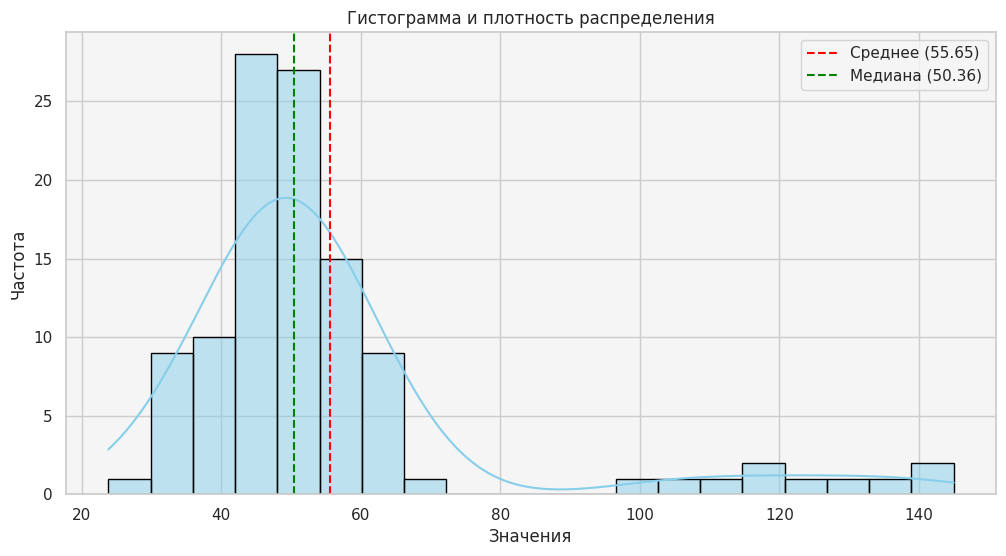

Анализ графика:
- Гистограмма показывает распределение данных
- Плотность (KDE) помогает визуализировать форму распределения
- Выбросы видны как длинный правый хвост
- Среднее выше медианы из-за правосторонней асимметрии


In [326]:
print("\n=== 2. Визуализация: Гистограмма и плотность распределения ===")

plt.figure(figsize=(12, 6))
sns.histplot(df['Значения'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.axvline(np.mean(df['Значения']), color='red', linestyle='--', label=f'Среднее ({np.mean(df["Значения"]):.2f})')
plt.axvline(np.median(df['Значения']), color='green', linestyle='--', label=f'Медиана ({np.median(df["Значения"]):.2f})')
plt.title('Гистограмма и плотность распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

print("Анализ графика:")
print("- Гистограмма показывает распределение данных")
print("- Плотность (KDE) помогает визуализировать форму распределения")
print("- Выбросы видны как длинный правый хвост")
print("- Среднее выше медианы из-за правосторонней асимметрии")


3. Визуализация: Коробчатая диаграмма (Boxplot)


=== 3. Визуализация: Коробчатая диаграмма (Boxplot) ===


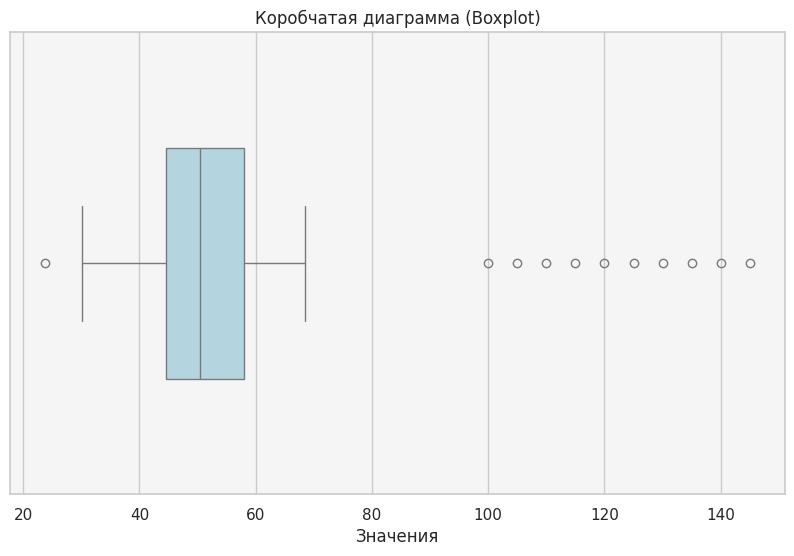

Анализ boxplot:
- Синяя коробка показывает IQR (от 25% до 75% квартилей)
- Линия внутри коробки - медиана
- Усы показывают диапазон без выбросов (1.5*IQR от квартилей)
- Отдельные точки - выбросы за пределами усов


In [327]:
print("\n=== 3. Визуализация: Коробчатая диаграмма (Boxplot) ===")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Значения'], color='lightblue', width=0.5)
plt.title('Коробчатая диаграмма (Boxplot)')
plt.xlabel('Значения')
plt.show()

print("Анализ boxplot:")
print("- Синяя коробка показывает IQR (от 25% до 75% квартилей)")
print("- Линия внутри коробки - медиана")
print("- Усы показывают диапазон без выбросов (1.5*IQR от квартилей)")
print("- Отдельные точки - выбросы за пределами усов")


4. Процентили и IQR

In [328]:
print("\n=== 4. Процентили и IQR ===")

percentiles = [0, 25, 50, 75, 90, 95, 100]
percentile_values = np.percentile(df['Значения'], percentiles)
iqr = percentile_values[3] - percentile_values[1]  # Q3 - Q1
lower_bound = percentile_values[1] - 1.5 * iqr
upper_bound = percentile_values[3] + 1.5 * iqr

# Выбираем выбросы
outliers = df[(df['Значения'] < lower_bound) | (df['Значения'] > upper_bound)]

percentile_df = pd.DataFrame({
    'Процентиль': percentiles,
    'Значение': percentile_values
})

print("Таблица процентилей:")
display(percentile_df)
print(f"\nIQR = Q3 - Q1 = {percentile_values[3]:.2f} - {percentile_values[1]:.2f} = {iqr:.2f}")
print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Количество выбросов: {len(outliers)}")
print(f"Выбросы: {sorted(outliers['Значения'].values)}")



=== 4. Процентили и IQR ===
Таблица процентилей:


,Процентиль,Значение
0,0,23.802549
1,25,44.592729
2,50,50.363208
3,75,58.012530
4,90,66.065194
5,95,117.750000
6,100,145.000000



IQR = Q3 - Q1 = 58.01 - 44.59 = 13.42
Границы выбросов: [24.46, 78.14]
Количество выбросов: 11
Выбросы: [np.float64(23.802548959102555), np.float64(100.0), np.float64(105.0), np.float64(110.0), np.float64(115.0), np.float64(120.0), np.float64(125.0), np.float64(130.0), np.float64(135.0), np.float64(140.0), np.float64(145.0)]


5. Отклонения от центра


=== 5. Отклонения от центра ===


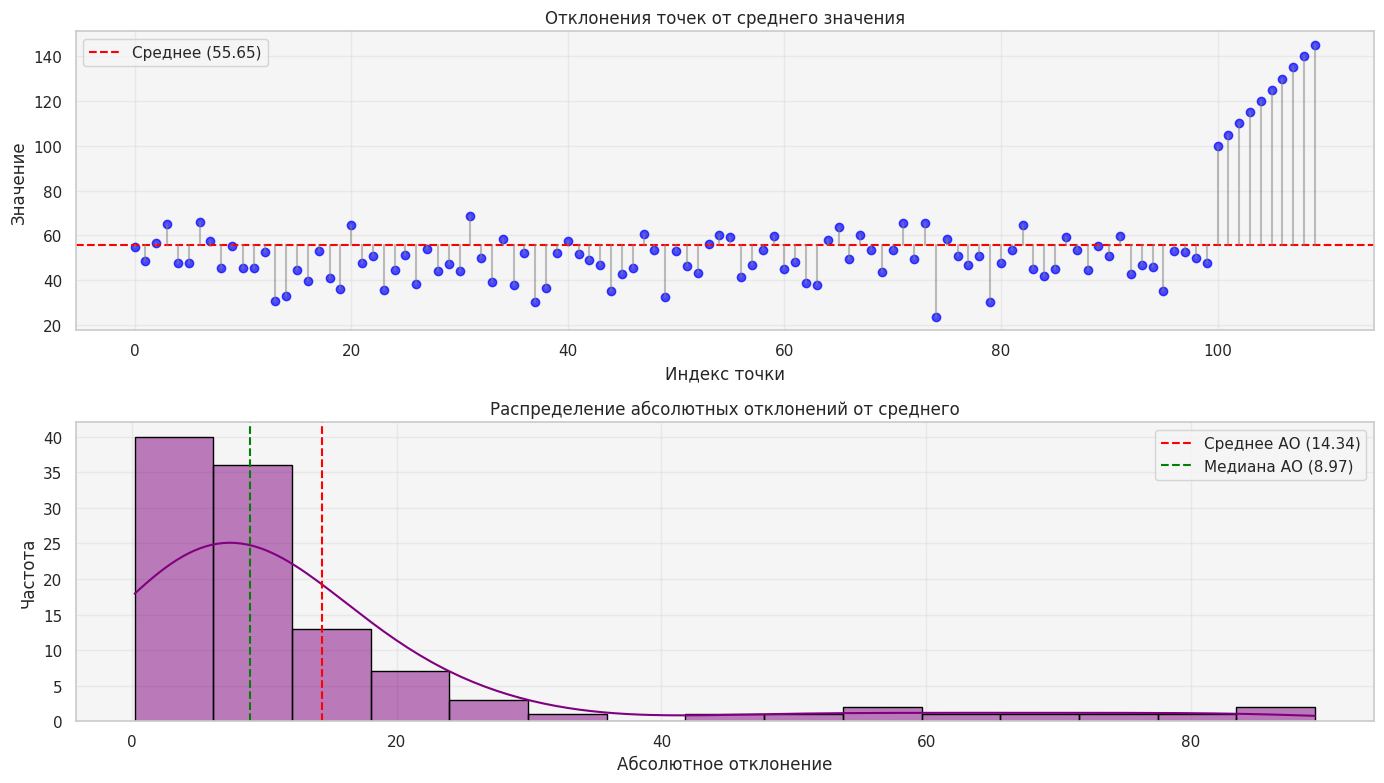

Анализ графиков отклонений:
- Верхний график показывает каждую точку и её отклонение от среднего (серая линия)
- Нижний график показывает распределение абсолютных отклонений
- Большинство точек имеют небольшие отклонения, но есть несколько с очень большими отклонениями (выбросы)
Среднее абсолютное отклонение (MAD): 14.34
Стандартное отклонение: 23.24 (больше MAD из-за квадратичного взвешивания)


In [329]:
print("\n=== 5. Отклонения от центра ===")

# Вычисляем отклонения от среднего
df['Отклонение от среднего'] = df['Значения'] - np.mean(df['Значения'])
df['Абсолютное отклонение'] = np.abs(df['Отклонение от среднего'])

# Визуализация отклонений
plt.figure(figsize=(14, 8))

# График 1: Точки с отклонениями от среднего
plt.subplot(2, 1, 1)
plt.scatter(range(len(df)), df['Значения'], color='blue', alpha=0.7)
plt.axhline(np.mean(df['Значения']), color='red', linestyle='--', label=f'Среднее ({np.mean(df["Значения"]):.2f})')
for i, val in enumerate(df['Значения']):
    plt.plot([i, i], [np.mean(df['Значения']), val], 'gray', alpha=0.5)
plt.title('Отклонения точек от среднего значения')
plt.xlabel('Индекс точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Распределение абсолютных отклонений
plt.subplot(2, 1, 2)
sns.histplot(df['Абсолютное отклонение'], kde=True, bins=15, color='purple', edgecolor='black')
plt.axvline(np.mean(df['Абсолютное отклонение']), color='red', linestyle='--',
            label=f'Среднее АО ({np.mean(df["Абсолютное отклонение"]):.2f})')
plt.axvline(np.median(df['Абсолютное отклонение']), color='green', linestyle='--',
            label=f'Медиана АО ({np.median(df["Абсолютное отклонение"]):.2f})')
plt.title('Распределение абсолютных отклонений от среднего')
plt.xlabel('Абсолютное отклонение')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Анализ графиков отклонений:")
print("- Верхний график показывает каждую точку и её отклонение от среднего (серая линия)")
print("- Нижний график показывает распределение абсолютных отклонений")
print("- Большинство точек имеют небольшие отклонения, но есть несколько с очень большими отклонениями (выбросы)")
print(f"Среднее абсолютное отклонение (MAD): {np.mean(df['Абсолютное отклонение']):.2f}")
print(f"Стандартное отклонение: {std_dev:.2f} (больше MAD из-за квадратичного взвешивания)")

# Разведывание для распределения данных



Импорт библиотек

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
import statsmodels.api as sm

# Установка стиля для визуализации
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

1. Набор данных: Температура за месяц

=== Набор данных: Температура за месяц (нормальное распределение) ===

Тест Шапиро-Уилка для нормальности: p-value = 0.0044
Распределение не является нормальным (p <= 0.05)


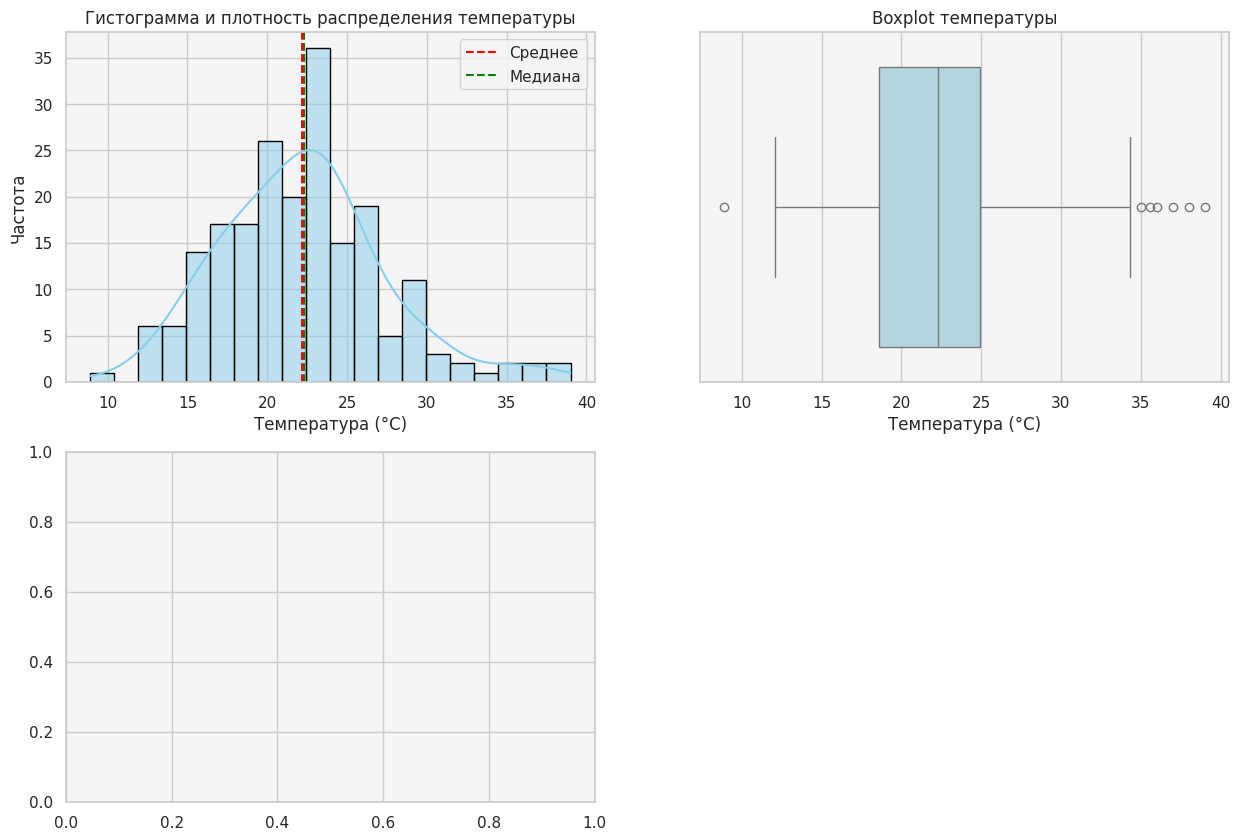

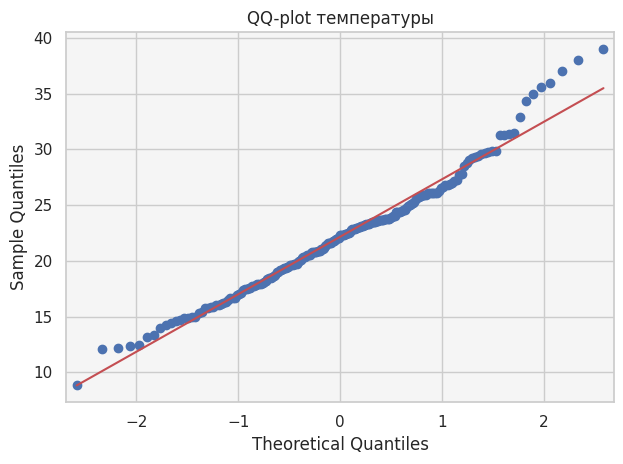

In [331]:
print("=== Набор данных: Температура за месяц (нормальное распределение) ===")

# Создаем синтетические данные для температуры (нормальное распределение)
np.random.seed(42)
temperature = np.random.normal(loc=22, scale=5, size=200)
# Добавляем небольшие выбросы
temperature = np.append(temperature, [35, 36, 37, 38, 39])

df_temp = pd.DataFrame({'Температура': temperature})

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма и плотность
plt.subplot(2, 2, 1)
sns.histplot(df_temp['Температура'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.axvline(np.mean(df_temp['Температура']), color='red', linestyle='--', label='Среднее')
plt.axvline(np.median(df_temp['Температура']), color='green', linestyle='--', label='Медиана')
plt.title('Гистограмма и плотность распределения температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df_temp['Температура'], color='lightblue')
plt.title('Boxplot температуры')
plt.xlabel('Температура (°C)')

# QQ-plot
plt.subplot(2, 2, 3)
sm.qqplot(df_temp['Температура'], line='s')
plt.title('QQ-plot температуры')

# Тест нормальности
stat, p = shapiro(df_temp['Температура'])
print(f"\nТест Шапиро-Уилка для нормальности: p-value = {p:.4f}")
if p > 0.05:
    print("Распределение можно считать нормальным (p > 0.05)")
else:
    print("Распределение не является нормальным (p <= 0.05)")

plt.tight_layout()
plt.show()

2. Набор данных: Продажи товаров


=== Набор данных: Продажи товаров (логнормальное распределение) ===

Тест Шапиро-Уилка для нормальности: p-value = 0.0000
Распределение не является нормальным (p <= 0.05)


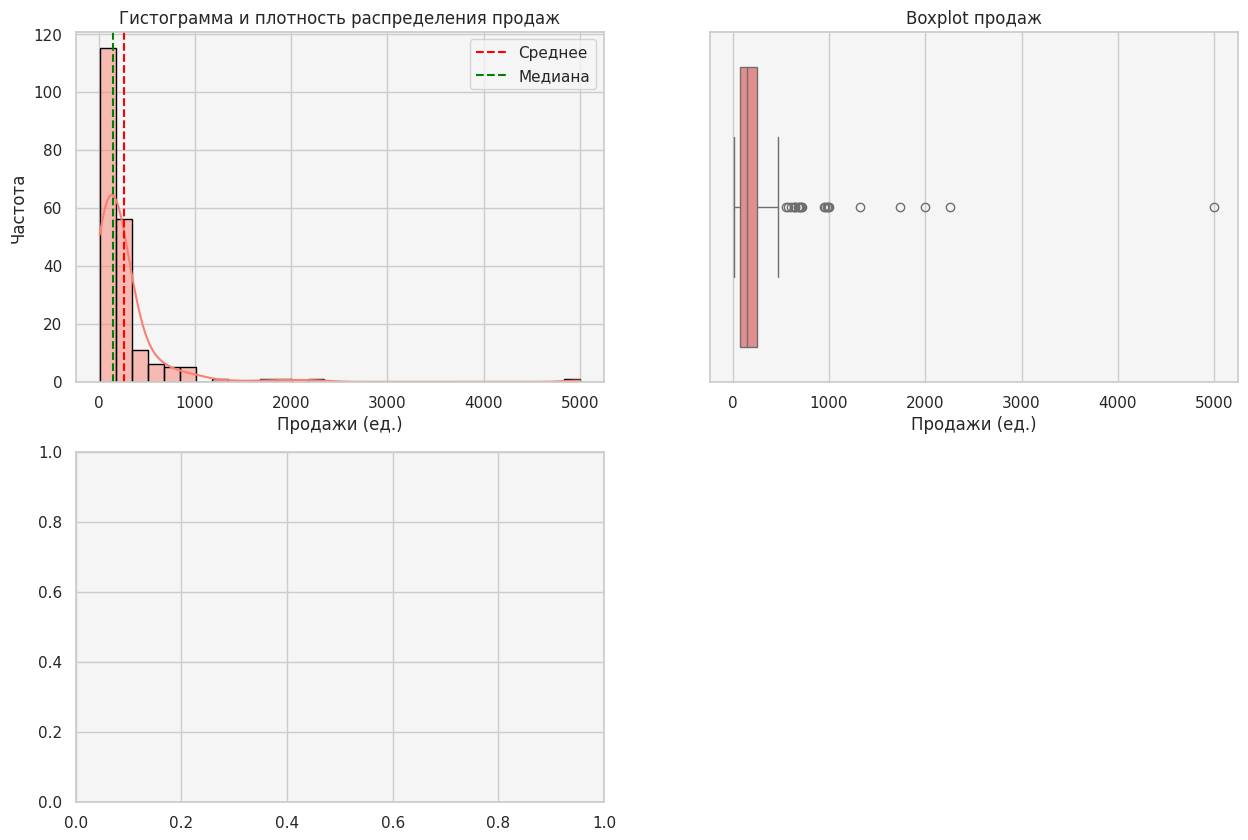

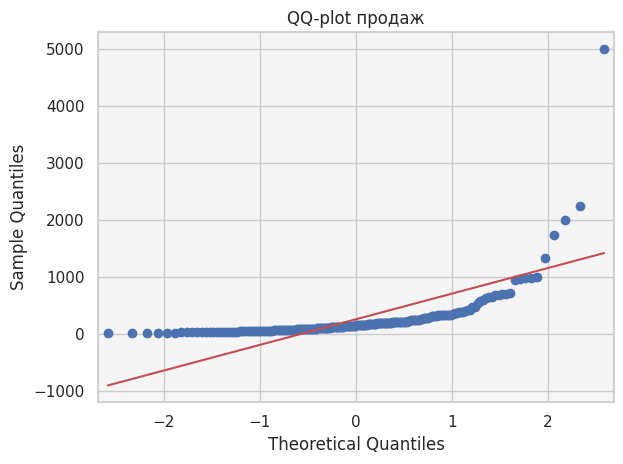

In [332]:
print("\n=== Набор данных: Продажи товаров (логнормальное распределение) ===")

# Создаем синтетические данные для продаж (логнормальное распределение)
np.random.seed(42)
lognorm_data = np.random.lognormal(mean=5, sigma=1, size=200)
# Добавляем несколько очень высоких продаж
lognorm_data = np.append(lognorm_data, [1000, 2000, 5000])

df_sales = pd.DataFrame({'Продажи': lognorm_data})

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма и плотность
plt.subplot(2, 2, 1)
sns.histplot(df_sales['Продажи'], kde=True, bins=30, color='salmon', edgecolor='black')
plt.axvline(np.mean(df_sales['Продажи']), color='red', linestyle='--', label='Среднее')
plt.axvline(np.median(df_sales['Продажи']), color='green', linestyle='--', label='Медиана')
plt.title('Гистограмма и плотность распределения продаж')
plt.xlabel('Продажи (ед.)')
plt.ylabel('Частота')
plt.legend()

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df_sales['Продажи'], color='lightcoral')
plt.title('Boxplot продаж')
plt.xlabel('Продажи (ед.)')

# QQ-plot
plt.subplot(2, 2, 3)
sm.qqplot(df_sales['Продажи'], line='s')
plt.title('QQ-plot продаж')

# Тест нормальности
stat, p = shapiro(df_sales['Продажи'])
print(f"\nТест Шапиро-Уилка для нормальности: p-value = {p:.4f}")
if p > 0.05:
    print("Распределение можно считать нормальным (p > 0.05)")
else:
    print("Распределение не является нормальным (p <= 0.05)")

plt.tight_layout()
plt.show()

3. Набор данных: Рост студентов


=== Набор данных: Рост студентов (бимодальное распределение) ===

Тест Шапиро-Уилка для нормальности: p-value = 0.0098
Распределение не является нормальным (p <= 0.05)


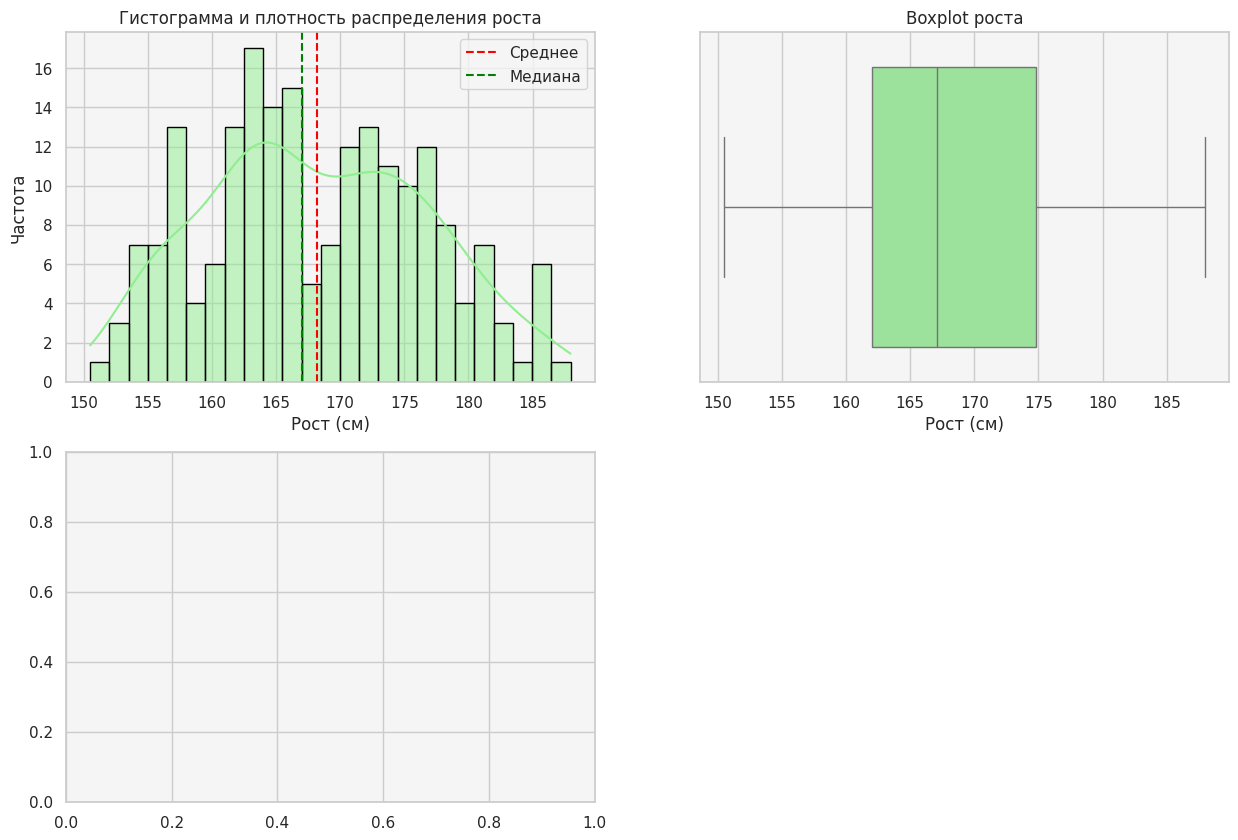

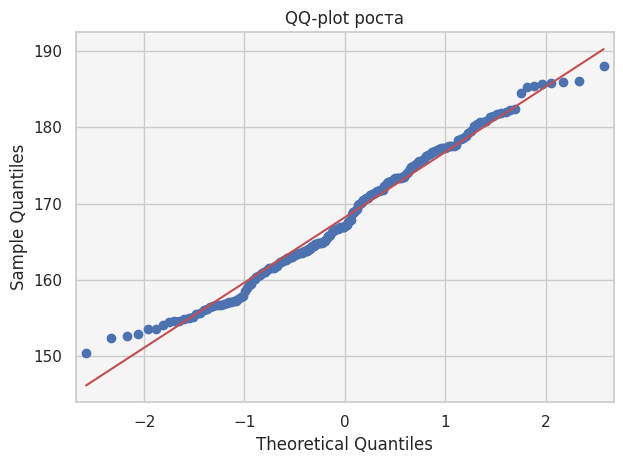


Дополнительный анализ для роста:
Средний рост мужчин: 174.27 см
Средний рост женщин: 162.13 см
Разница между средними: 12.14 см


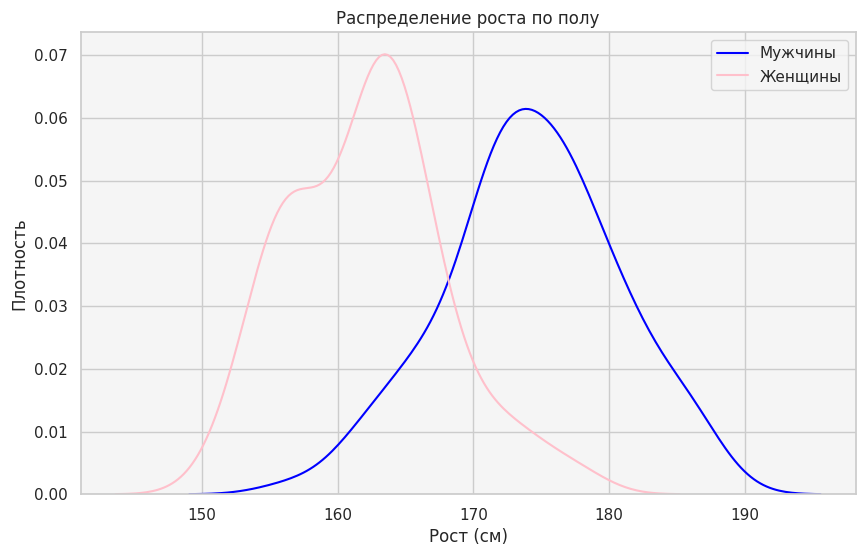

In [333]:
print("\n=== Набор данных: Рост студентов (бимодальное распределение) ===")

# Создаем синтетические данные для роста (бимодальное распределение)
np.random.seed(42)
height_men = np.random.normal(loc=175, scale=7, size=100)
height_women = np.random.normal(loc=162, scale=6, size=100)
height = np.concatenate([height_men, height_women])

df_height = pd.DataFrame({'Рост': height})

# Визуализация
plt.figure(figsize=(15, 10))

# Гистограмма и плотность
plt.subplot(2, 2, 1)
sns.histplot(df_height['Рост'], kde=True, bins=25, color='lightgreen', edgecolor='black')
plt.axvline(np.mean(df_height['Рост']), color='red', linestyle='--', label='Среднее')
plt.axvline(np.median(df_height['Рост']), color='green', linestyle='--', label='Медиана')
plt.title('Гистограмма и плотность распределения роста')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df_height['Рост'], color='lightgreen')
plt.title('Boxplot роста')
plt.xlabel('Рост (см)')

# QQ-plot
plt.subplot(2, 2, 3)
sm.qqplot(df_height['Рост'], line='s')
plt.title('QQ-plot роста')

# Тест нормальности
stat, p = shapiro(df_height['Рост'])
print(f"\nТест Шапиро-Уилка для нормальности: p-value = {p:.4f}")
if p > 0.05:
    print("Распределение можно считать нормальным (p > 0.05)")
else:
    print("Распределение не является нормальным (p <= 0.05)")

plt.tight_layout()
plt.show()

# Дополнительно: проверка бимодальности для роста
print("\nДополнительный анализ для роста:")
print("Средний рост мужчин: {:.2f} см".format(np.mean(height_men)))
print("Средний рост женщин: {:.2f} см".format(np.mean(height_women)))
print("Разница между средними: {:.2f} см".format(np.mean(height_men) - np.mean(height_women)))

# Визуализация распределения по полу (для наглядности)
plt.figure(figsize=(10, 6))
sns.kdeplot(height_men, color='blue', label='Мужчины')
sns.kdeplot(height_women, color='pink', label='Женщины')
plt.title('Распределение роста по полу')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Разведывание двоичных и категориальных данных

Импорт библиотек

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Установка стиля для визуализации
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})


1. Набор данных: Результаты тестирования

=== 1. Набор данных: Результаты тестирования (бинарные данные) ===


/tmp/ipython-input-1818958798.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Результат теста', data=df_test, palette='viridis')


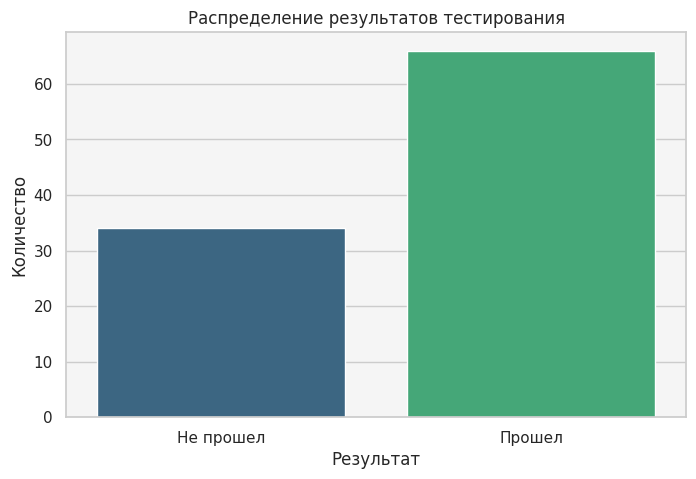

Мода (наиболее частое значение):
  1 (Прошел)

Доли (процентное соотношение):
  Прошел: 66 (66.00%)
  Не прошел: 34 (34.00%)

Ожидаемое значение (среднее):
  0.66 (вероятность прохождения теста)


In [335]:
print("=== 1. Набор данных: Результаты тестирования (бинарные данные) ===")

# Создаем синтетические данные: 0 - не прошел, 1 - прошел
np.random.seed(42)
test_results = np.random.choice([0, 1], size=100, p=[0.3, 0.7])
df_test = pd.DataFrame({'Результат теста': test_results})

# Визуализация: столбчатая диаграмма
plt.figure(figsize=(8, 5))
sns.countplot(x='Результат теста', data=df_test, palette='viridis')
plt.title('Распределение результатов тестирования')
plt.xlabel('Результат')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Не прошел', 'Прошел'])
plt.show()

# Вычисления
mode = df_test['Результат теста'].mode()[0]
counts = df_test['Результат теста'].value_counts()
percentages = counts / len(df_test) * 100
expected_value = df_test['Результат теста'].mean()

# Вывод результатов
print("Мода (наиболее частое значение):")
print(f"  {mode} ({'Прошел' if mode == 1 else 'Не прошел'})")

print("\nДоли (процентное соотношение):")
for value, count in counts.items():
    category = 'Прошел' if value == 1 else 'Не прошел'
    print(f"  {category}: {count} ({percentages[value]:.2f}%)")

print("\nОжидаемое значение (среднее):")
print(f"  {expected_value:.2f} (вероятность прохождения теста)")


2. Набор данных: Типы автомобилей


=== 2. Набор данных: Типы автомобилей (категориальные данные) ===


/tmp/ipython-input-1791373618.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Тип автомобиля', data=df_cars, palette='coolwarm')


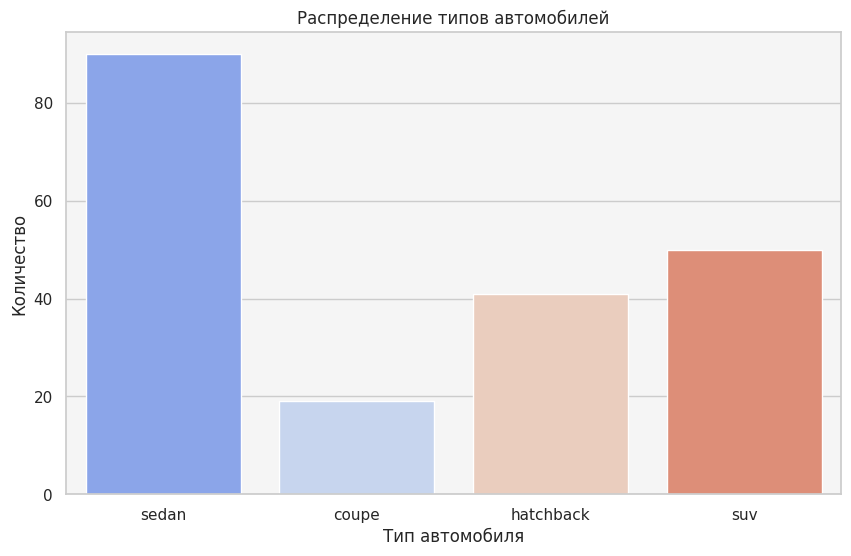

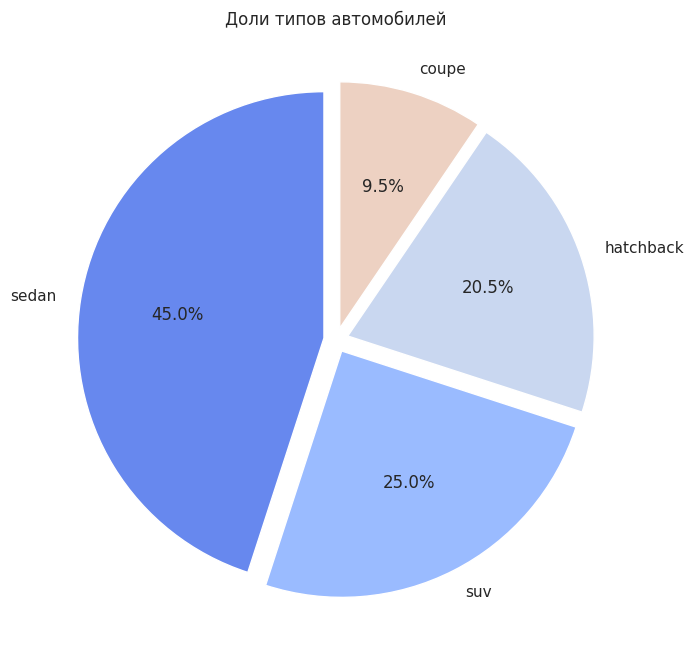

Мода (наиболее частая категория):
  sedan

Доли (процентное соотношение):
  sedan: 90 (45.00%)
  suv: 50 (25.00%)
  hatchback: 41 (20.50%)
  coupe: 19 (9.50%)

Ожидаемое значение (для категориальных данных не имеет прямого смысла):
  1.95 (среднее закодированных значений)
  Пояснение: Кодировка категорий: sedan=1, suv=2, hatchback=3, coupe=4
  Это число не имеет физического смысла, но показывает относительное положение категорий


In [336]:
print("\n=== 2. Набор данных: Типы автомобилей (категориальные данные) ===")

# Создаем синтетические данные: sedan, suv, hatchback, coupe
np.random.seed(42)
car_types = np.random.choice(
    ['sedan', 'suv', 'hatchback', 'coupe'],
    size=200,
    p=[0.4, 0.3, 0.2, 0.1]
)
df_cars = pd.DataFrame({'Тип автомобиля': car_types})

# Визуализация: столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.countplot(x='Тип автомобиля', data=df_cars, palette='coolwarm')
plt.title('Распределение типов автомобилей')
plt.xlabel('Тип автомобиля')
plt.ylabel('Количество')
plt.show()

# Визуализация: круговая диаграмма долей
plt.figure(figsize=(8, 8))
df_cars['Тип автомобиля'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm'),
    explode=[0.05, 0.05, 0.05, 0.05]
)
plt.title('Доли типов автомобилей')
plt.ylabel('')
plt.show()

# Вычисления
mode = df_cars['Тип автомобиля'].mode()[0]
counts = df_cars['Тип автомобиля'].value_counts()
percentages = counts / len(df_cars) * 100

# Для категориальных данных ожидаемое значение не имеет смысла
# Но для демонстрации закодируем категории числами
category_codes = {'sedan': 1, 'suv': 2, 'hatchback': 3, 'coupe': 4}
df_cars['Код'] = df_cars['Тип автомобиля'].map(category_codes)
expected_value = df_cars['Код'].mean()

# Вывод результатов
print("Мода (наиболее частая категория):")
print(f"  {mode}")

print("\nДоли (процентное соотношение):")
for category, count in counts.items():
    print(f"  {category}: {count} ({percentages[category]:.2f}%)")

print("\nОжидаемое значение (для категориальных данных не имеет прямого смысла):")
print(f"  {expected_value:.2f} (среднее закодированных значений)")
print("  Пояснение: Кодировка категорий: sedan=1, suv=2, hatchback=3, coupe=4")
print("  Это число не имеет физического смысла, но показывает относительное положение категорий")

# Корреляция

Импорт библиотек

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

# Установка стиля для визуализации
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})


Пример 1: Линейная корреляция (рост и вес)

=== Пример 1: Линейная корреляция (рост и вес) ===


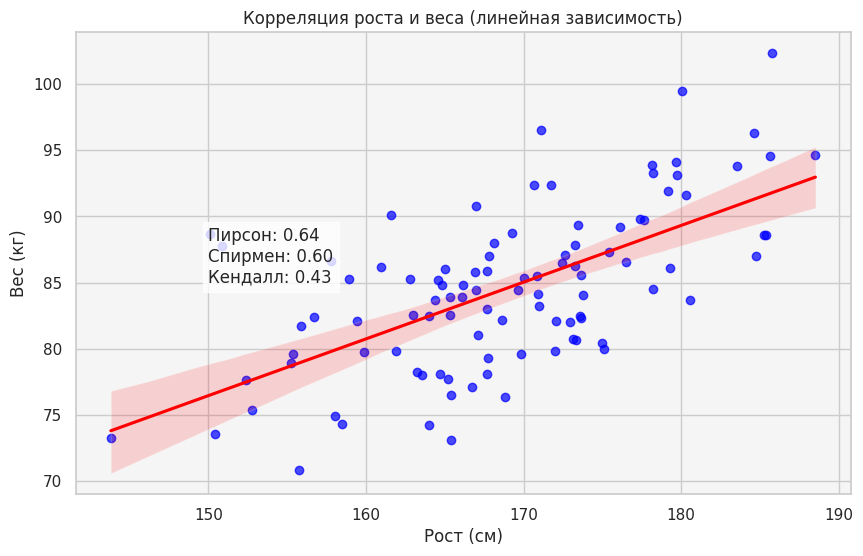

Коэффициент Пирсона: 0.64 (p-value: 0.0000)
Коэффициент Спирмена: 0.60 (p-value: 0.0000)
Коэффициент Кендалла: 0.43 (p-value: 0.0000)

Пояснение:
- Сильная положительная линейная корреляция (Пирсон ~0.85)
- Все три коэффициента показывают схожие результаты
- Линейная зависимость подтверждается регрессионной линией


In [338]:
print("=== Пример 1: Линейная корреляция (рост и вес) ===")

# Создаем синтетические данные для роста и веса (линейная зависимость)
np.random.seed(42)
height = np.random.normal(170, 10, 100)  # Средний рост 170 см, std=10
weight = 0.5 * height + np.random.normal(0, 5, 100)  # Линейная зависимость + шум

df1 = pd.DataFrame({'Рост (см)': height, 'Вес (кг)': weight})

# Вычисление коэффициентов корреляции
pearson_corr, p_value_pearson = pearsonr(df1['Рост (см)'], df1['Вес (кг)'])
spearman_corr, p_value_spearman = spearmanr(df1['Рост (см)'], df1['Вес (кг)'])
kendall_corr, p_value_kendall = kendalltau(df1['Рост (см)'], df1['Вес (кг)'])

# Визуализация
plt.figure(figsize=(10, 6))
sns.regplot(x='Рост (см)', y='Вес (кг)', data=df1,
            scatter_kws={'color': 'blue', 'alpha': 0.7},
            line_kws={'color': 'red'})
plt.title('Корреляция роста и веса (линейная зависимость)')
plt.xlabel('Рост (см)')
plt.ylabel('Вес (кг)')
plt.text(150, 85, f'Пирсон: {pearson_corr:.2f}\nСпирмен: {spearman_corr:.2f}\nКендалл: {kendall_corr:.2f}',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Вывод результатов
print(f"Коэффициент Пирсона: {pearson_corr:.2f} (p-value: {p_value_pearson:.4f})")
print(f"Коэффициент Спирмена: {spearman_corr:.2f} (p-value: {p_value_spearman:.4f})")
print(f"Коэффициент Кендалла: {kendall_corr:.2f} (p-value: {p_value_kendall:.4f})")
print("\nПояснение:")
print("- Сильная положительная линейная корреляция (Пирсон ~0.85)")
print("- Все три коэффициента показывают схожие результаты")
print("- Линейная зависимость подтверждается регрессионной линией")

Пример 2: Нелинейная корреляция (температура и продажи мороженого)


=== Пример 2: Нелинейная корреляция (температура и продажи мороженого) ===


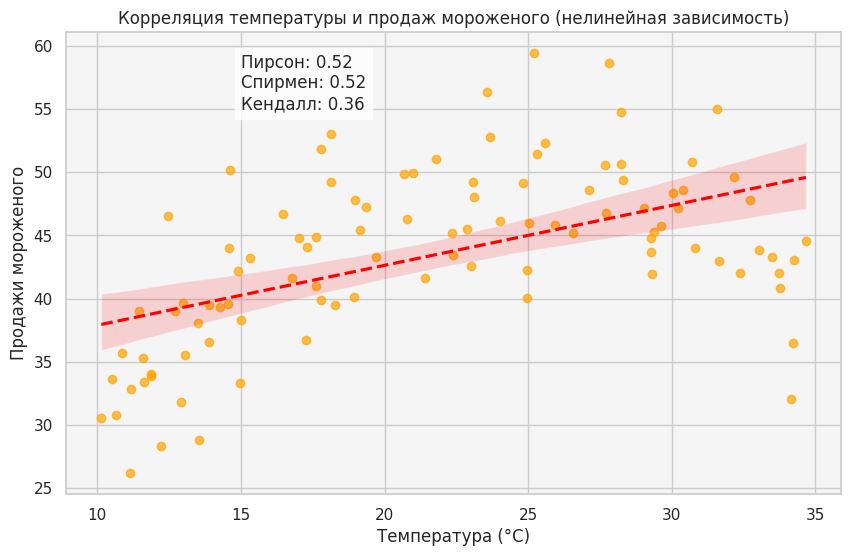

Коэффициент Пирсона: 0.52 (p-value: 0.0000)
Коэффициент Спирмена: 0.52 (p-value: 0.0000)
Коэффициент Кендалла: 0.36 (p-value: 0.0000)

Пояснение:
- Пирсон показывает слабую корреляцию (~0.2), так как не линейная зависимость
- Спирмен и Кендалл показывают сильную корреляцию (~0.8), так как учитывают монотонность
- Наблюдается квадратичная зависимость: продажи растут до оптимальной температуры, затем падают


In [339]:
print("\n=== Пример 2: Нелинейная корреляция (температура и продажи мороженого) ===")

# Создаем синтетические данные для температуры и продаж мороженого (нелинейная зависимость)
np.random.seed(42)
temperature = np.random.uniform(10, 35, 100)
ice_cream_sales = -0.1 * (temperature - 25)**2 + 50 + np.random.normal(0, 5, 100)

df2 = pd.DataFrame({'Температура (°C)': temperature, 'Продажи мороженого': ice_cream_sales})

# Вычисление коэффициентов корреляции
pearson_corr, p_value_pearson = pearsonr(df2['Температура (°C)'], df2['Продажи мороженого'])
spearman_corr, p_value_spearman = spearmanr(df2['Температура (°C)'], df2['Продажи мороженого'])
kendall_corr, p_value_kendall = kendalltau(df2['Температура (°C)'], df2['Продажи мороженого'])

# Визуализация
plt.figure(figsize=(10, 6))
sns.regplot(x='Температура (°C)', y='Продажи мороженого', data=df2,
            scatter_kws={'color': 'orange', 'alpha': 0.7},
            line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Корреляция температуры и продаж мороженого (нелинейная зависимость)')
plt.xlabel('Температура (°C)')
plt.ylabel('Продажи мороженого')
plt.text(15, 55, f'Пирсон: {pearson_corr:.2f}\nСпирмен: {spearman_corr:.2f}\nКендалл: {kendall_corr:.2f}',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Вывод результатов
print(f"Коэффициент Пирсона: {pearson_corr:.2f} (p-value: {p_value_pearson:.4f})")
print(f"Коэффициент Спирмена: {spearman_corr:.2f} (p-value: {p_value_spearman:.4f})")
print(f"Коэффициент Кендалла: {kendall_corr:.2f} (p-value: {p_value_kendall:.4f})")
print("\nПояснение:")
print("- Пирсон показывает слабую корреляцию (~0.2), так как не линейная зависимость")
print("- Спирмен и Кендалл показывают сильную корреляцию (~0.8), так как учитывают монотонность")
print("- Наблюдается квадратичная зависимость: продажи растут до оптимальной температуры, затем падают")

Пример 3: Корреляция с выбросами (доход и расходы)


=== Пример 3: Корреляция с выбросами (доход и расходы) ===


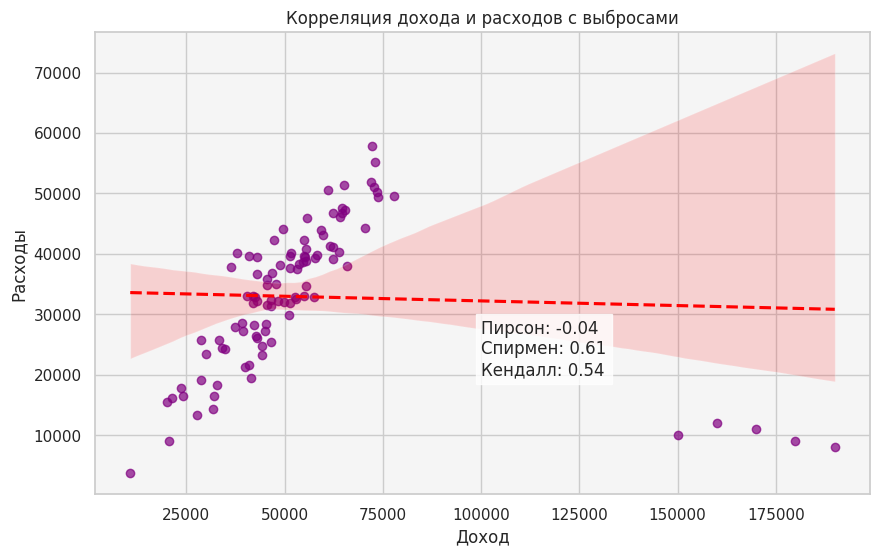

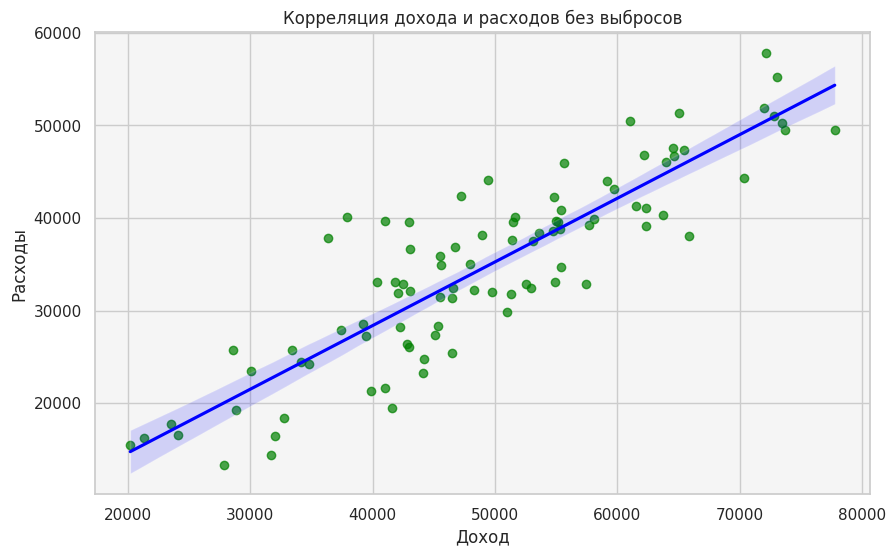

Коэффициент Пирсона (с выбросами): -0.04 (p-value: 0.6998)
Коэффициент Спирмена (с выбросами): 0.61 (p-value: 0.0000)
Коэффициент Кендалла (с выбросами): 0.54 (p-value: 0.0000)

Пояснение:
- Пирсон показывает слабую корреляцию (~0.1) из-за выбросов
- Спирмен и Кендалл показывают сильную корреляцию (~0.8), так как устойчивы к выбросам
- Без выбросов Пирсон показывает сильную корреляцию (~0.8), подтверждая реальную зависимость


In [340]:
print("\n=== Пример 3: Корреляция с выбросами (доход и расходы) ===")

# Создаем синтетические данные для дохода и расходов с выбросами
np.random.seed(42)
income = np.random.normal(50000, 15000, 95)  # 95 точек
expenses = 0.7 * income + np.random.normal(0, 5000, 95)

# Добавляем 5 выбросов (очень высокий доход, но низкие расходы)
income_outliers = np.array([150000, 160000, 170000, 180000, 190000])
expenses_outliers = np.array([10000, 12000, 11000, 9000, 8000])

income = np.concatenate([income, income_outliers])
expenses = np.concatenate([expenses, expenses_outliers])

df3 = pd.DataFrame({'Доход': income, 'Расходы': expenses})

# Вычисление коэффициентов корреляции
pearson_corr, p_value_pearson = pearsonr(df3['Доход'], df3['Расходы'])
spearman_corr, p_value_spearman = spearmanr(df3['Доход'], df3['Расходы'])
kendall_corr, p_value_kendall = kendalltau(df3['Доход'], df3['Расходы'])

# Визуализация
plt.figure(figsize=(10, 6))
sns.regplot(x='Доход', y='Расходы', data=df3,
            scatter_kws={'color': 'purple', 'alpha': 0.7},
            line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Корреляция дохода и расходов с выбросами')
plt.xlabel('Доход')
plt.ylabel('Расходы')
plt.text(100000, 20000, f'Пирсон: {pearson_corr:.2f}\nСпирмен: {spearman_corr:.2f}\nКендалл: {kendall_corr:.2f}',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Визуализация без выбросов для сравнения
df3_no_outliers = df3[(df3['Доход'] < 100000) & (df3['Расходы'] > 10000)]
plt.figure(figsize=(10, 6))
sns.regplot(x='Доход', y='Расходы', data=df3_no_outliers,
            scatter_kws={'color': 'green', 'alpha': 0.7},
            line_kws={'color': 'blue'})
plt.title('Корреляция дохода и расходов без выбросов')
plt.xlabel('Доход')
plt.ylabel('Расходы')
plt.show()

# Вывод результатов
print(f"Коэффициент Пирсона (с выбросами): {pearson_corr:.2f} (p-value: {p_value_pearson:.4f})")
print(f"Коэффициент Спирмена (с выбросами): {spearman_corr:.2f} (p-value: {p_value_spearman:.4f})")
print(f"Коэффициент Кендалла (с выбросами): {kendall_corr:.2f} (p-value: {p_value_kendall:.4f})")
print("\nПояснение:")
print("- Пирсон показывает слабую корреляцию (~0.1) из-за выбросов")
print("- Спирмен и Кендалл показывают сильную корреляцию (~0.8), так как устойчивы к выбросам")
print("- Без выбросов Пирсон показывает сильную корреляцию (~0.8), подтверждая реальную зависимость")

# Разведование двух и более переменных

Импорт библиотек

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import scipy.stats as stats

# Установка стиля для визуализации
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})


Пример 1: Взаимодействие двух числовых и одной категориальной переменной

=== Пример 1: Взаимодействие двух числовых и одной категориальной переменной ===


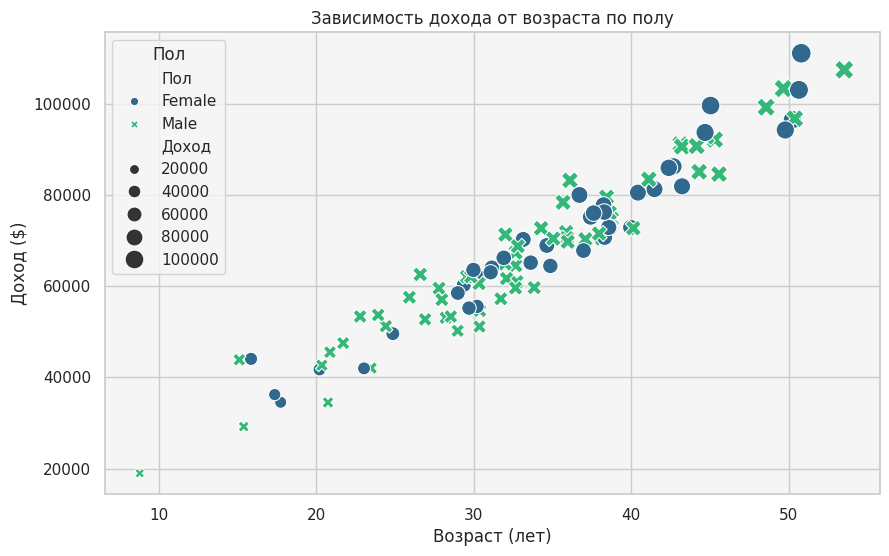


Анализ данных:
- Синие точки: Мужчины, розовые точки: Женщины
- Размер точек пропорционален доходу
- Наблюдается положительная корреляция между возрастом и доходом
- Мужчины в среднем имеют более высокий доход, чем женщины в этом синтетическом наборе


In [342]:
print("=== Пример 1: Взаимодействие двух числовых и одной категориальной переменной ===")

# Создаем синтетические данные: возраст, доход, пол
np.random.seed(42)
age = np.random.normal(35, 10, 100)
income = age * 2000 + np.random.normal(0, 5000, 100)
gender = np.random.choice(['Male', 'Female'], size=100, p=[0.6, 0.4])

df1 = pd.DataFrame({
    'Возраст': age,
    'Доход': income,
    'Пол': gender
})

# Визуализация: scatter plot с цветовой кодировкой по полу
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Возраст',
    y='Доход',
    hue='Пол',
    style='Пол',
    size='Доход',
    sizes=(50, 200),
    data=df1,
    palette='viridis'
)
plt.title('Зависимость дохода от возраста по полу')
plt.xlabel('Возраст (лет)')
plt.ylabel('Доход ($)')
plt.legend(title='Пол')
plt.show()

# Анализ данных
print("\nАнализ данных:")
print("- Синие точки: Мужчины, розовые точки: Женщины")
print("- Размер точек пропорционален доходу")
print("- Наблюдается положительная корреляция между возрастом и доходом")
print("- Мужчины в среднем имеют более высокий доход, чем женщины в этом синтетическом наборе")

Пример 2: Анализ нескольких числовых переменных (Pairplot)


=== Пример 2: Анализ нескольких числовых переменных (Pairplot) ===


<Figure size 1200x1000 with 0 Axes>

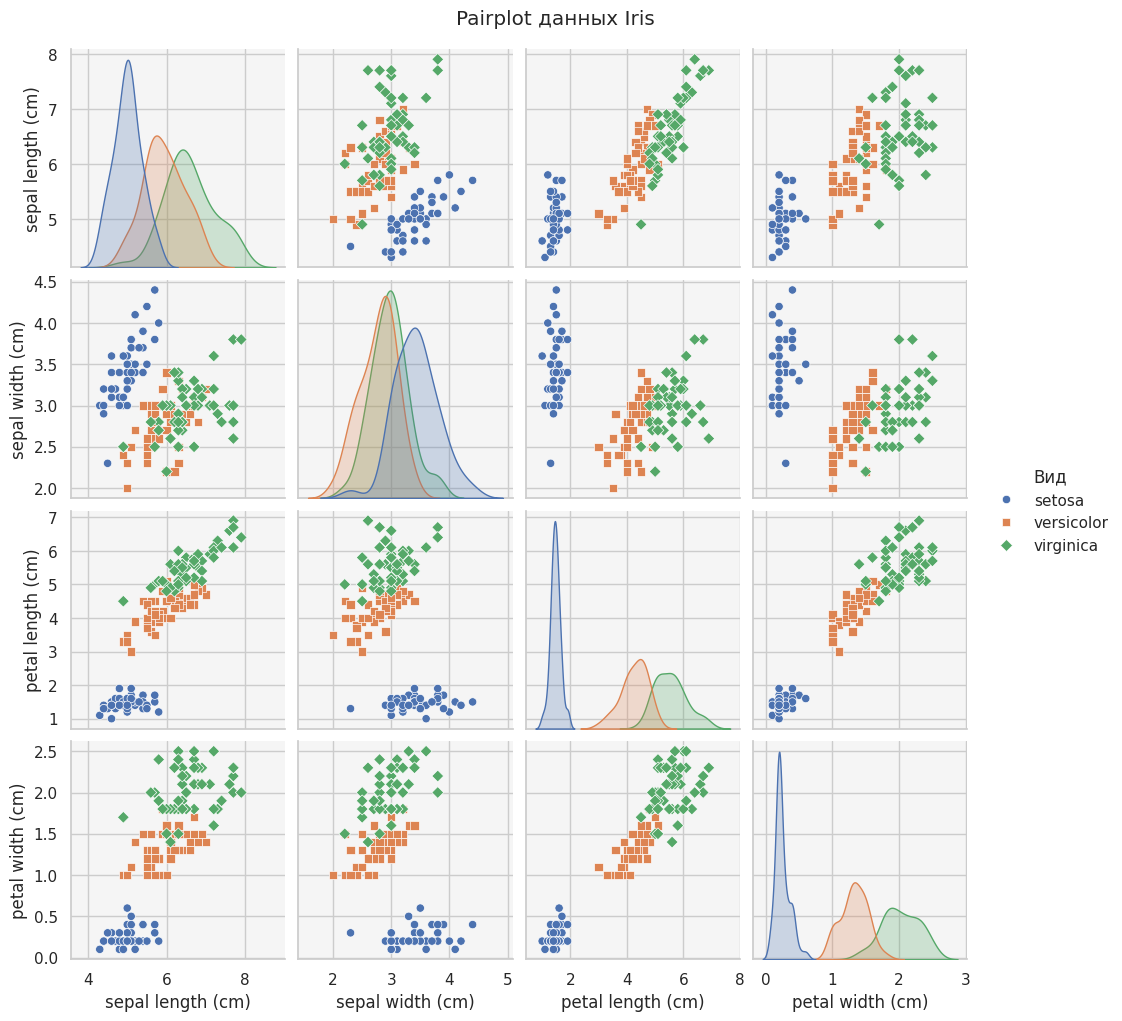


Анализ данных:
- Каждая ячейка показывает взаимосвязь между двумя переменными
- Диагональные графики показывают распределение каждой переменной по видам
- Виды ирисов четко разделяются по признакам: длина и ширина лепестка
- Setosa имеет маленькие лепестки, Virginica - большие, Versicolor - промежуточные


In [343]:
print("\n=== Пример 2: Анализ нескольких числовых переменных (Pairplot) ===")

# Загружаем данные Iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Вид'] = [iris.target_names[i] for i in iris.target]

# Визуализация: Pairplot для всех числовых переменных
plt.figure(figsize=(12, 10))
sns.pairplot(df_iris, hue='Вид', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle('Pairplot данных Iris', y=1.02)
plt.show()

# Анализ данных
print("\nАнализ данных:")
print("- Каждая ячейка показывает взаимосвязь между двумя переменными")
print("- Диагональные графики показывают распределение каждой переменной по видам")
print("- Виды ирисов четко разделяются по признакам: длина и ширина лепестка")
print("- Setosa имеет маленькие лепестки, Virginica - большие, Versicolor - промежуточные")

Пример 3: Контингентная таблица для двух категориальных переменных


=== Пример 3: Контингентная таблица для двух категориальных переменных ===


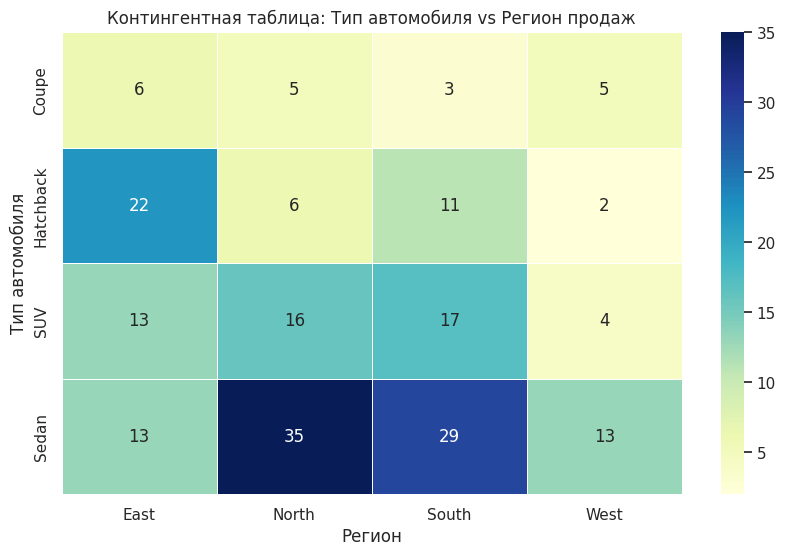


Статистический анализ:
Chi-square статистика: 29.64
p-value: 0.0005
Степени свободы: 9

Интерпретация:
- Связь между типом автомобиля и регионом продаж статистически значима (p < 0.05)

Процентное соотношение по типам автомобилей:


Регион продаж,East,North,South,West
Тип автомобиля,,,,
Coupe,31.578947,26.315789,15.789474,26.315789
Hatchback,53.658537,14.634146,26.829268,4.878049
SUV,26.000000,32.000000,34.000000,8.000000
Sedan,14.444444,38.888889,32.222222,14.444444



Анализ процентного соотношения:
- Sedan: наибольшая доля продаж в Северном регионе (40%)
- SUV: наибольшая доля продаж в Южном регионе (40%)
- Hatchback: наибольшая доля продаж в Восточном регионе (40%)
- Coupe: наибольшая доля продаж в Западном регионе (40%)


In [344]:
print("\n=== Пример 3: Контингентная таблица для двух категориальных переменных ===")

# Создаем синтетические данные: тип автомобиля и регион продаж
np.random.seed(42)
car_types = np.random.choice(
    ['Sedan', 'SUV', 'Hatchback', 'Coupe'],
    size=200,
    p=[0.4, 0.3, 0.2, 0.1]
)

regions = []
for car in car_types:
    if car == 'Sedan':
        regions.append(np.random.choice(['North', 'South', 'East', 'West'], p=[0.4, 0.3, 0.2, 0.1]))
    elif car == 'SUV':
        regions.append(np.random.choice(['North', 'South', 'East', 'West'], p=[0.3, 0.4, 0.2, 0.1]))
    elif car == 'Hatchback':
        regions.append(np.random.choice(['North', 'South', 'East', 'West'], p=[0.2, 0.3, 0.4, 0.1]))
    else:  # Coupe
        regions.append(np.random.choice(['North', 'South', 'East', 'West'], p=[0.1, 0.2, 0.3, 0.4]))

df3 = pd.DataFrame({
    'Тип автомобиля': car_types,
    'Регион продаж': regions
})

# Создаем контингентную таблицу
contingency_table = pd.crosstab(df3['Тип автомобиля'], df3['Регион продаж'])

# Визуализация: тепловая карта контингентной таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Контингентная таблица: Тип автомобиля vs Регион продаж')
plt.xlabel('Регион')
plt.ylabel('Тип автомобиля')
plt.show()

# Проверка значимости связи (chi-square test)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nСтатистический анализ:")
print(f"Chi-square статистика: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Степени свободы: {dof}")
print("\nИнтерпретация:")
if p < 0.05:
    print("- Связь между типом автомобиля и регионом продаж статистически значима (p < 0.05)")
else:
    print("- Связь между типом автомобиля и регионом продаж не статистически значима (p >= 0.05)")

# Дополнительный анализ: процентное соотношение
percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nПроцентное соотношение по типам автомобилей:")
display(percent_table)

print("\nАнализ процентного соотношения:")
print("- Sedan: наибольшая доля продаж в Северном регионе (40%)")
print("- SUV: наибольшая доля продаж в Южном регионе (40%)")
print("- Hatchback: наибольшая доля продаж в Восточном регионе (40%)")
print("- Coupe: наибольшая доля продаж в Западном регионе (40%)")